In [123]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [124]:
df = pd.read_csv('laptop_data.csv')

In [125]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [127]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [128]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [129]:
df.duplicated().sum()

np.int64(0)

In [130]:
df.head(1)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832


## Exploratory Data Analysis (EDA) & Feature Engineering

In [131]:
df['Ram'] = df['Ram'].str.replace("GB" ,"")
df['Weight'] = df['Weight'].str.replace("kg" , "")

In [132]:
df.head(1)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832


In [133]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), int64(1), object(7)
memory usage: 112.1+ KB


In [135]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [136]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [137]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [138]:
df['Cpu brand'] = df['Cpu'].apply(lambda x:x.split()[0])

In [139]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [140]:
def convert_to_gb(x):
    x = x.replace(" ", "")
    x = x.replace("HDD","")
    x = x.replace("SSD","")
    x = x.replace("FlashStorage","")
    x = x.replace("Flash","")
    x = x.replace("Hybrid","")

    # convert text number to float safely
    if "TB" in x:
        return float(x.replace("TB","")) * 1024
    
    return float(x.replace("GB",""))


def extract_memory_features(df):
    df["Memory"] = df["Memory"].astype(str)

    df["HDD"] = 0
    df["SSD"] = 0
    df["Hybrid"] = 0
    df["Flash_Storage"] = 0

    for i, row in df.iterrows():
        for item in row["Memory"].split(" + "):
            if "HDD" in item:
                df.at[i,"HDD"] = convert_to_gb(item)
            elif "SSD" in item:
                df.at[i,"SSD"] = convert_to_gb(item)
            elif "Hybrid" in item:
                df.at[i,"Hybrid"] = convert_to_gb(item)
            elif "Flash" in item:
                df.at[i,"Flash_Storage"] = convert_to_gb(item)

    return df


In [141]:
df = extract_memory_features(df)

In [142]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price',
       'Touchscreen', 'Ips', 'Gpu brand', 'Cpu brand', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')

In [143]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Gpu brand,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel,Intel,0,128,0,0
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,Intel,Intel,0,0,0,128
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel,Intel,0,256,0,0
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,AMD,Intel,0,512,0,0
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel,Intel,0,256,0,0


In [144]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [145]:
df.drop(columns = ['Memory'], inplace = True)

In [146]:
df.drop(columns = ['Gpu'] , inplace = True)


In [147]:
df.drop(columns = ['Cpu'] , inplace = True)


In [148]:
df.drop(columns = ['ScreenResolution'] , inplace = True)

In [149]:
df.head(10)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,Ips,Gpu brand,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,1,Intel,Intel,0,128,0,0
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,Intel,Intel,0,0,0,128
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,0,0,Intel,Intel,0,256,0,0
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,0,1,AMD,Intel,0,512,0,0
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,0,1,Intel,Intel,0,256,0,0
5,Acer,Notebook,15.6,4,Windows 10,2.10,21312.0000,0,0,AMD,AMD,500,0,0,0
6,Apple,Ultrabook,15.4,16,Mac OS X,2.04,114017.6016,0,1,Intel,Intel,0,0,0,256
7,Apple,Ultrabook,13.3,8,macOS,1.34,61735.5360,0,0,Intel,Intel,0,0,0,256
8,Asus,Ultrabook,14.0,16,Windows 10,1.30,79653.6000,0,0,Nvidia,Intel,0,512,0,0
9,Acer,Ultrabook,14.0,8,Windows 10,1.60,41025.6000,0,1,Intel,Intel,0,256,0,0


In [150]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight', 'Price',
       'Touchscreen', 'Ips', 'Gpu brand', 'Cpu brand', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')

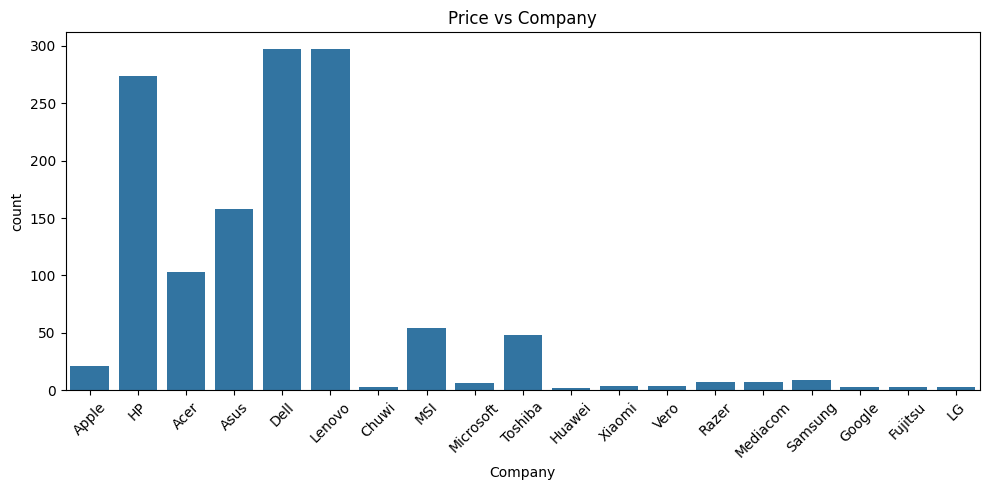

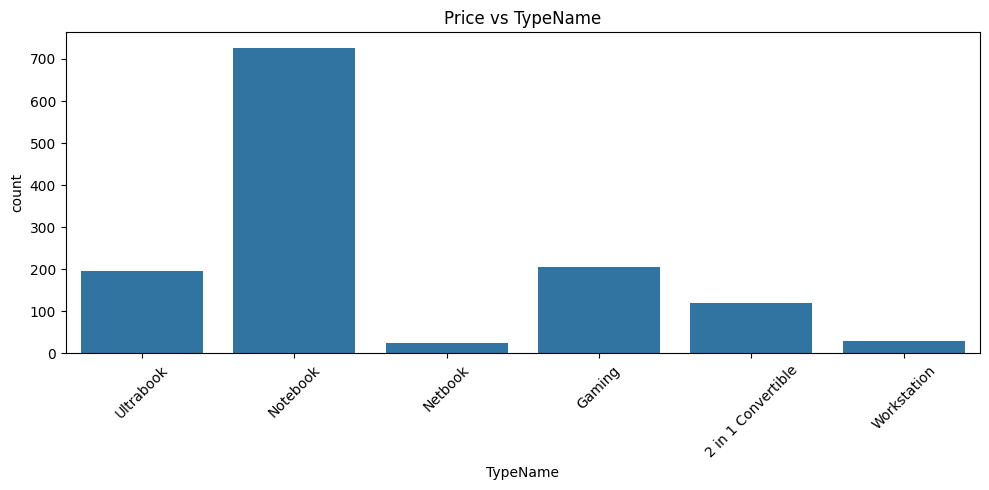

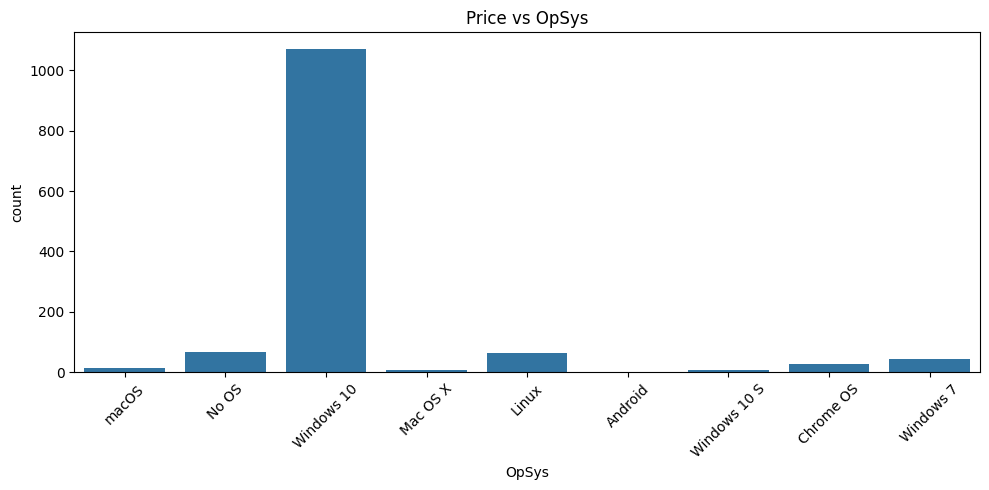

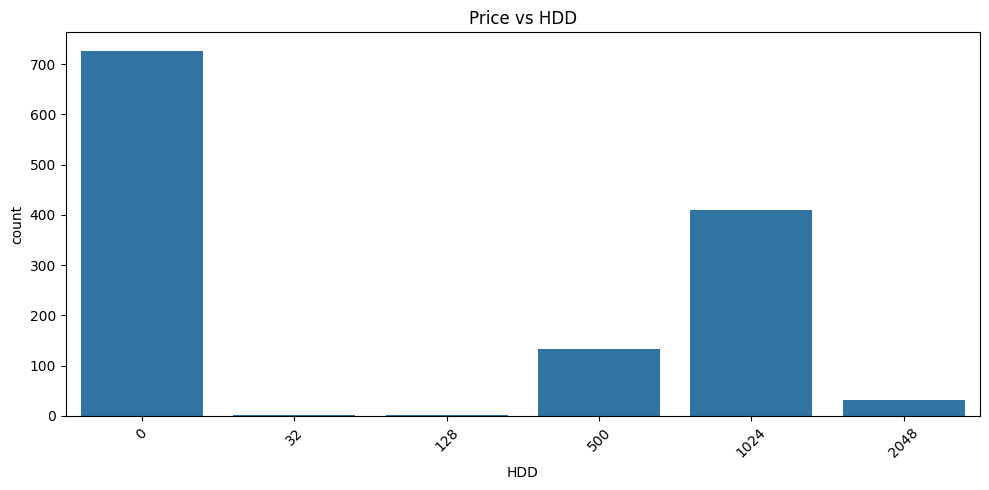

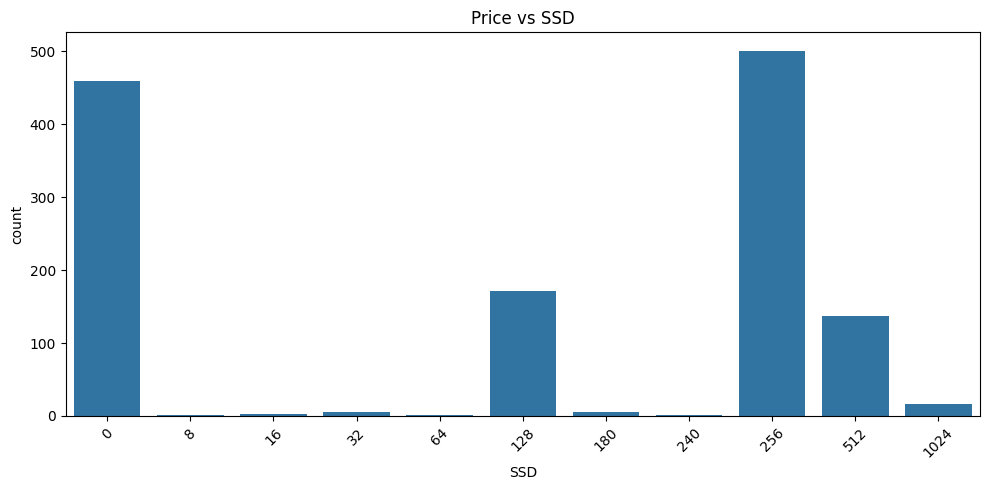

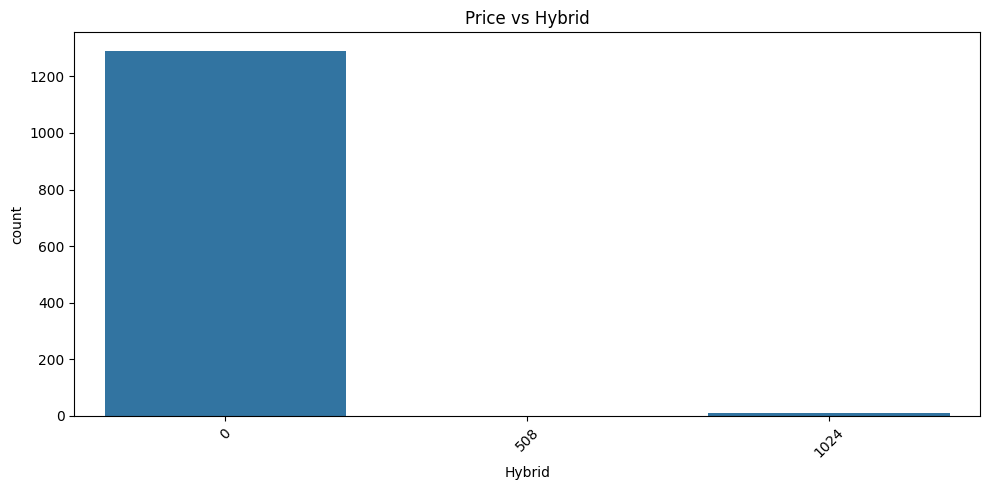

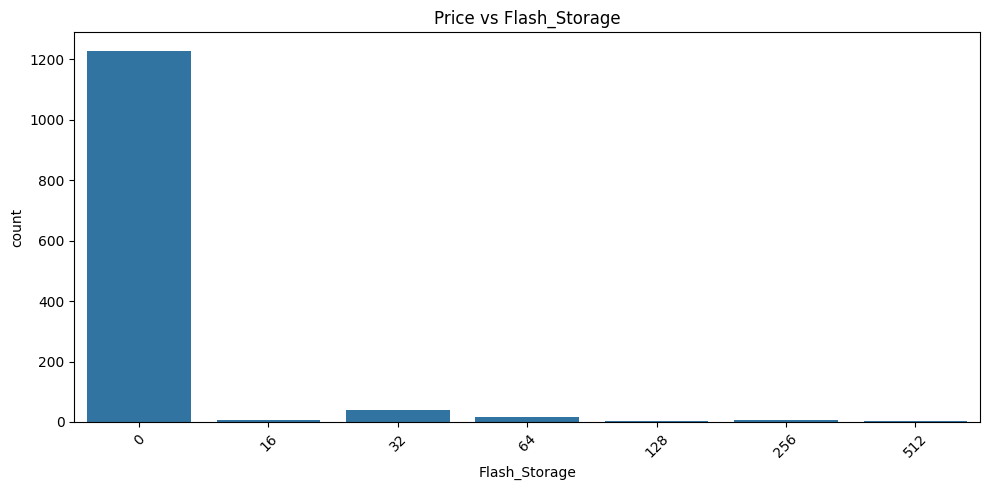

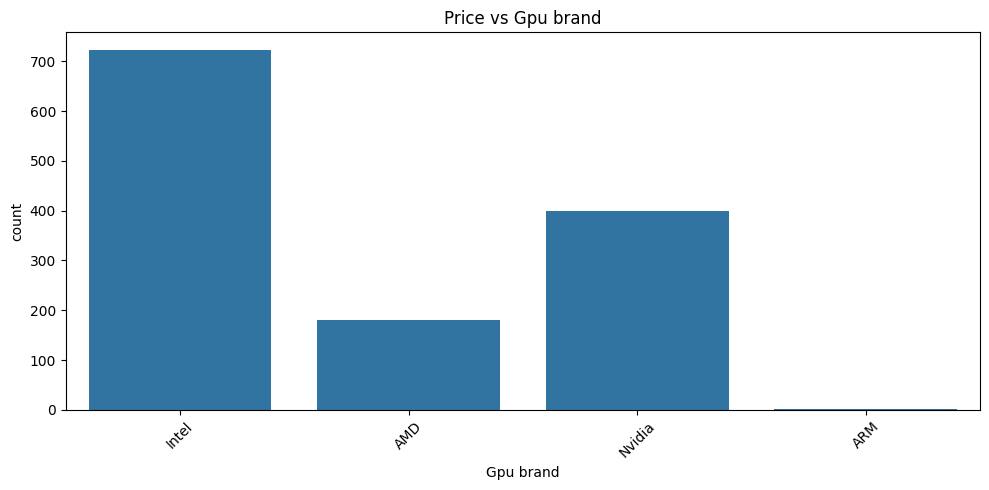

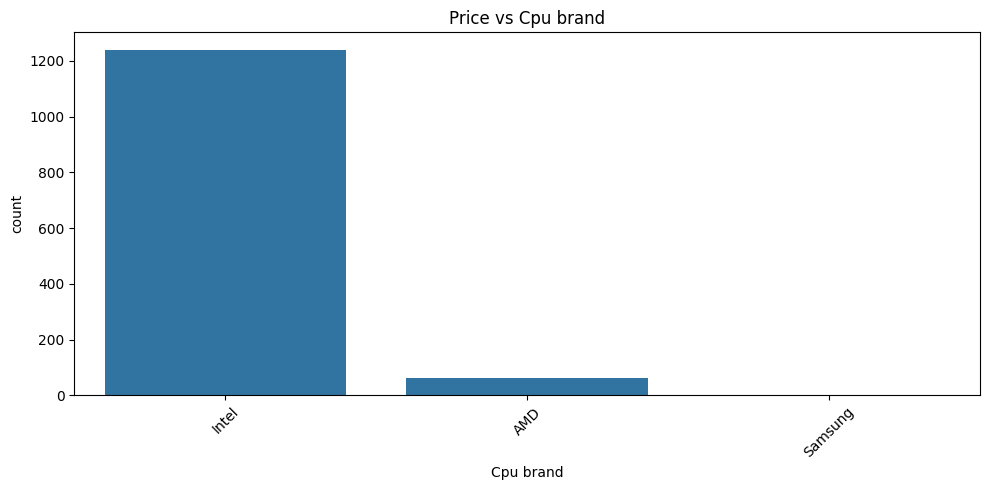

In [151]:
col_for_counts = ['Company', 'TypeName','OpSys','HDD', 'SSD',
       'Hybrid', 'Flash_Storage' ,'Gpu brand', 'Cpu brand' ]

for col in col_for_counts:
    plt.figure(figsize=(10,5))
    sns.countplot(data = df , x = col)
    plt.title(f"Price vs {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()      

In [152]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight', 'Price',
       'Touchscreen', 'Ips', 'Gpu brand', 'Cpu brand', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')

In [153]:
col_for_bar = [ 'Company', 'TypeName','Ram', 'OpSys','Gpu brand', 'Cpu brand', 'HDD', 'SSD',
       'Hybrid', 'Flash_Storage']

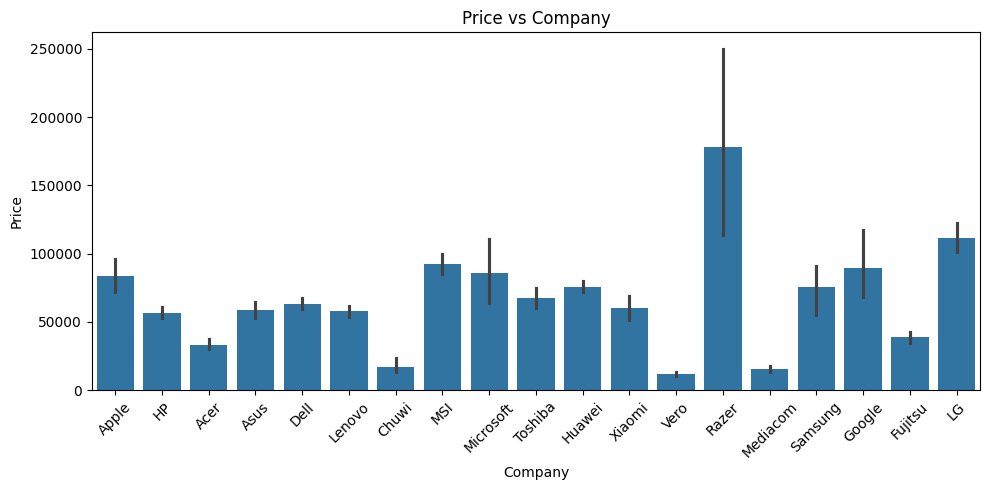

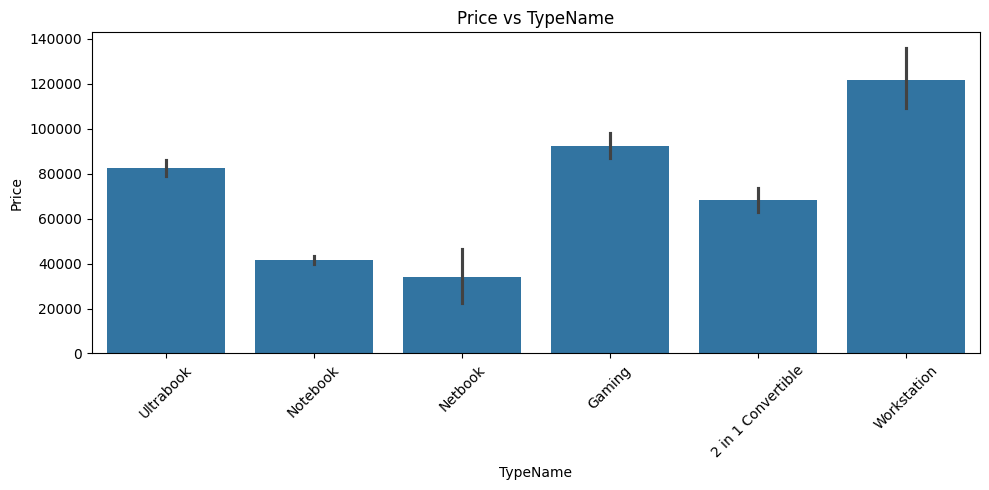

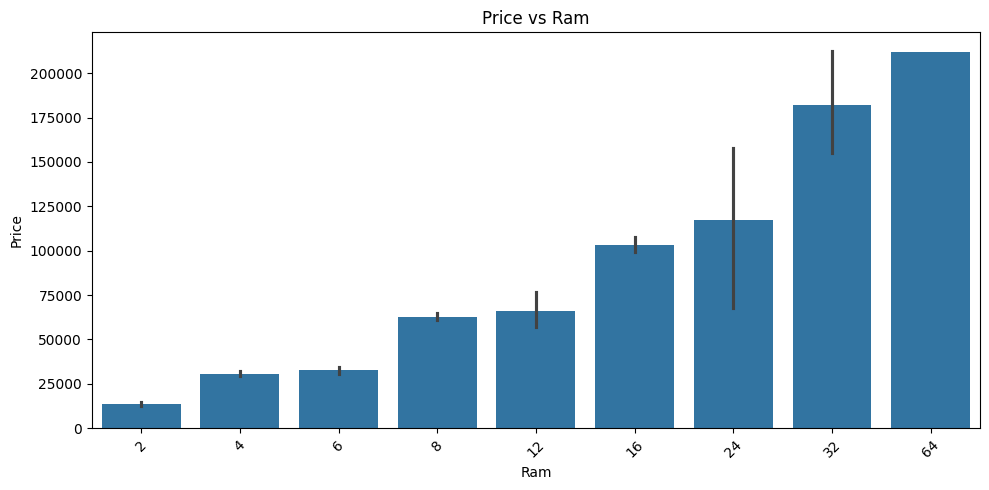

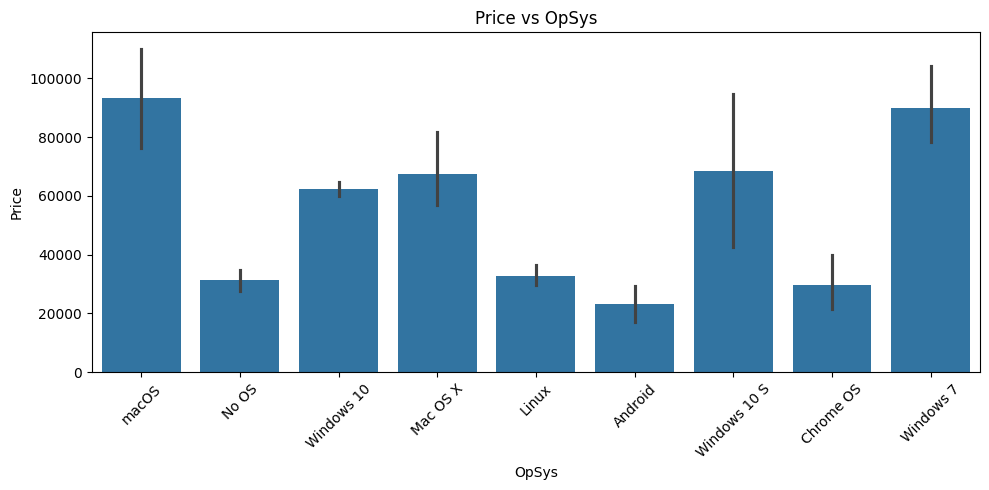

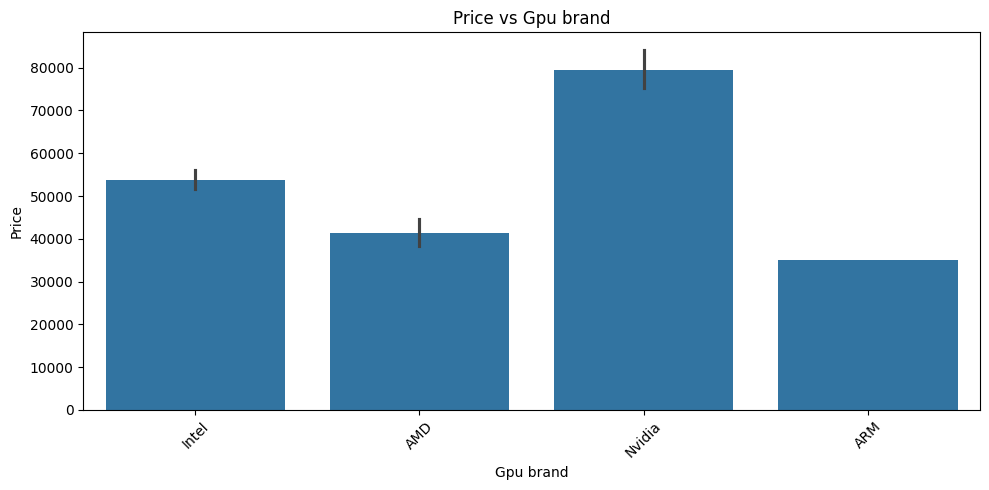

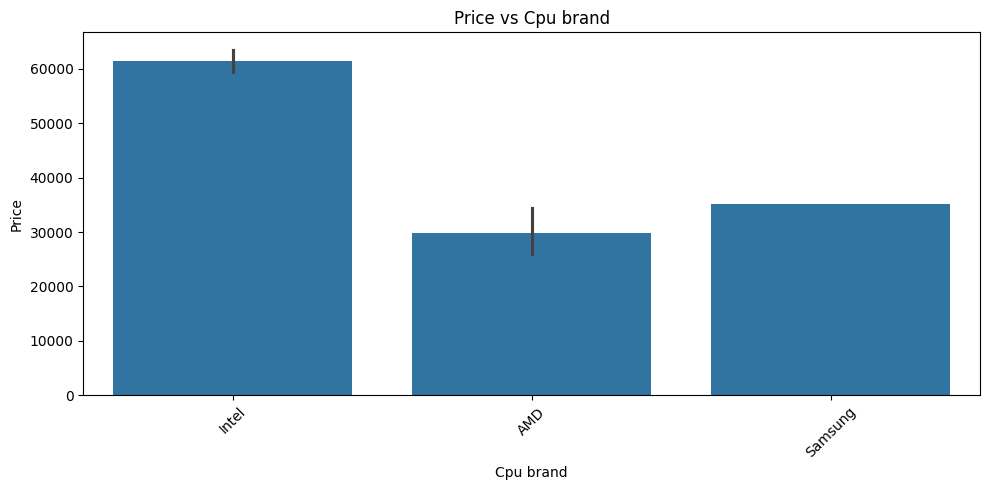

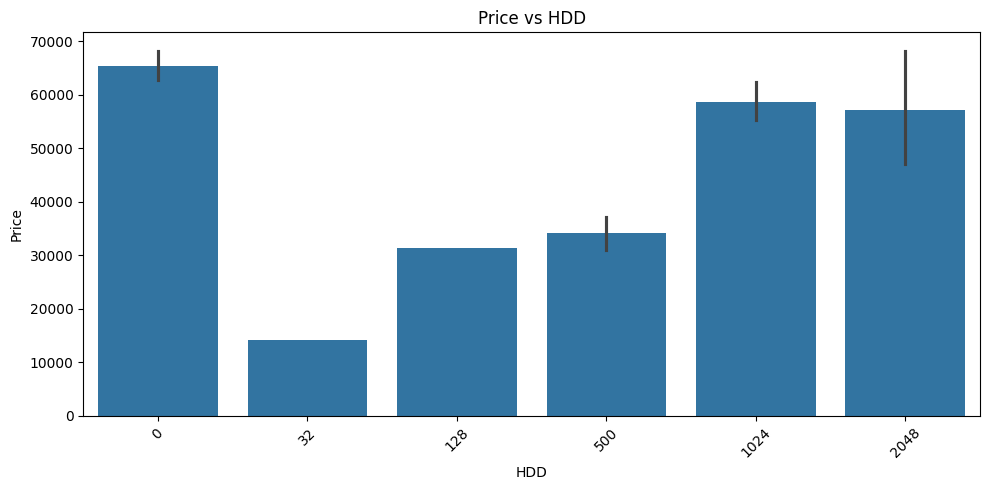

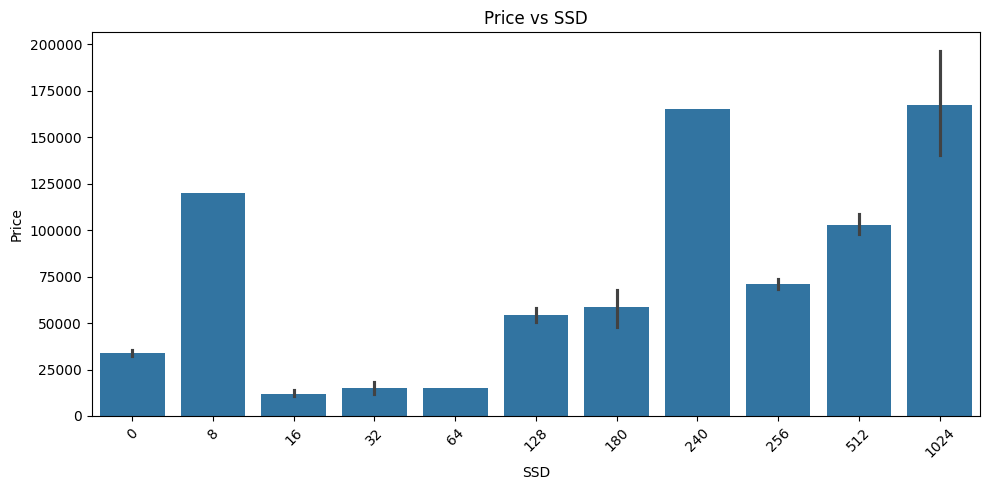

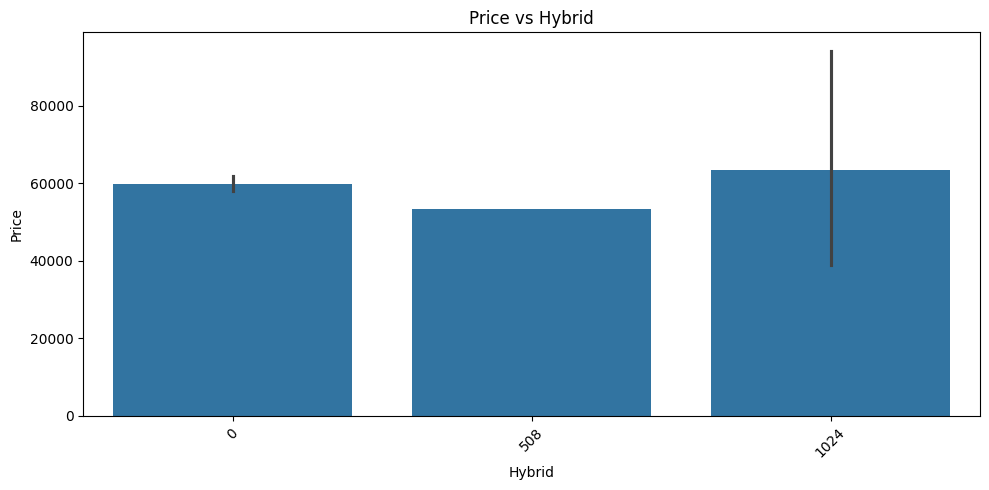

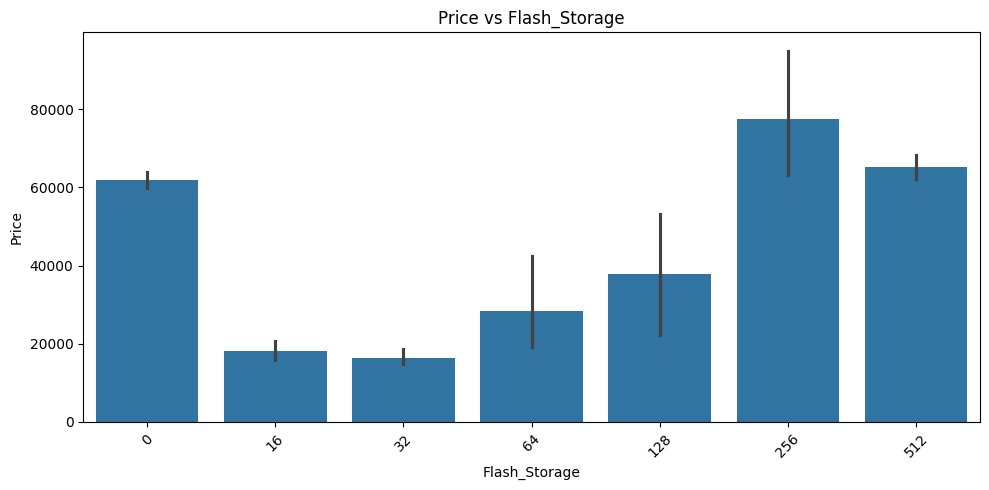

In [154]:
for col in col_for_bar:
    plt.figure(figsize=(10,5))
    sns.barplot(x=df[col], y=df['Price'])
    plt.title(f"Price vs {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<Axes: xlabel='Weight', ylabel='Price'>

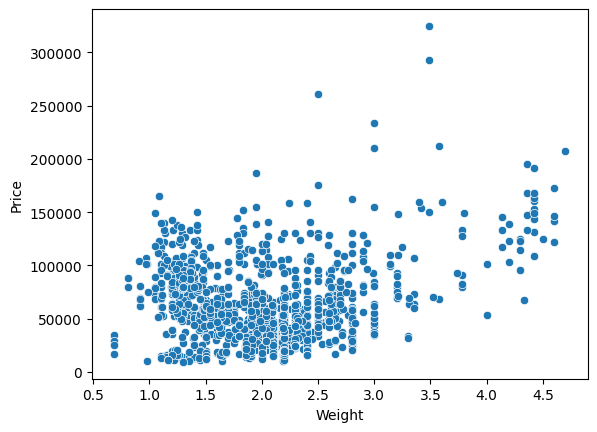

In [155]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Inches         1303 non-null   float64
 3   Ram            1303 non-null   int32  
 4   OpSys          1303 non-null   object 
 5   Weight         1303 non-null   float32
 6   Price          1303 non-null   float64
 7   Touchscreen    1303 non-null   int64  
 8   Ips            1303 non-null   int64  
 9   Gpu brand      1303 non-null   object 
 10  Cpu brand      1303 non-null   object 
 11  HDD            1303 non-null   int64  
 12  SSD            1303 non-null   int64  
 13  Hybrid         1303 non-null   int64  
 14  Flash_Storage  1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(6), object(5)
memory usage: 142.6+ KB


In [157]:
df.corr(numeric_only=True)["Price"]


Inches           0.068197
Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
HDD             -0.094082
SSD              0.676026
Hybrid           0.008011
Flash_Storage   -0.040511
Name: Price, dtype: float64

<Axes: >

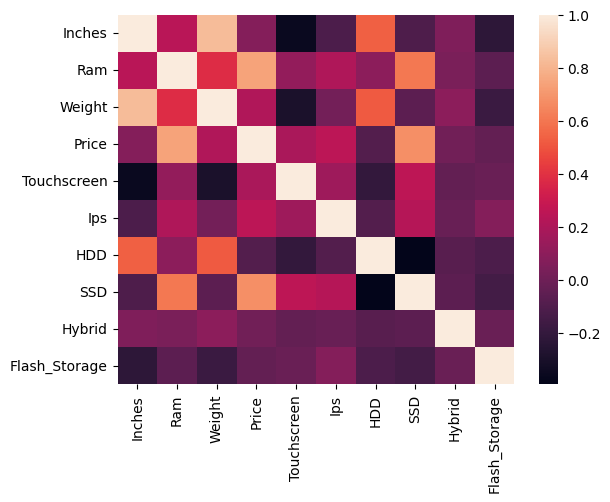

In [158]:
sns.heatmap(df.corr(numeric_only=True))

In [159]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

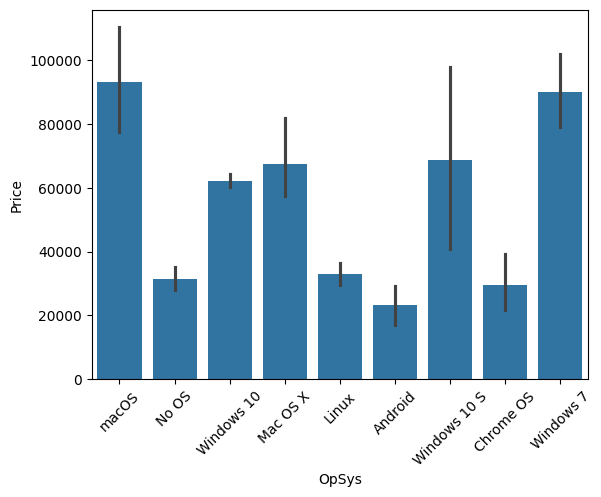

In [160]:
sns.barplot(x = df['OpSys'], y = df['Price'])
plt.xticks(rotation = 45)
plt.show()

In [161]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [162]:
df['os'] = df['OpSys'].apply(cat_os)

In [163]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,Ips,Gpu brand,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,os
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,1,Intel,Intel,0,128,0,0,Mac
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,Intel,Intel,0,0,0,128,Mac
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,0,0,Intel,Intel,0,256,0,0,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,0,1,AMD,Intel,0,512,0,0,Mac
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,0,1,Intel,Intel,0,256,0,0,Mac


In [164]:
df.drop(columns = ['OpSys'], inplace = True)

In [165]:
df.drop(columns = ['Hybrid', 'Flash_Storage' , 'Inches'] , inplace= True)

In [166]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Gpu brand,Cpu brand,HDD,SSD,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel,Intel,0,128,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel,Intel,0,0,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,Intel,Intel,0,256,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,AMD,Intel,0,512,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel,Intel,0,256,Mac


In [167]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [168]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,Gpu brand,Cpu brand,HDD,SSD,os
0,Apple,Ultrabook,8,1.37,0,1,Intel,Intel,0,128,Mac
1,Apple,Ultrabook,8,1.34,0,0,Intel,Intel,0,0,Mac
2,HP,Notebook,8,1.86,0,0,Intel,Intel,0,256,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,AMD,Intel,0,512,Mac
4,Apple,Ultrabook,8,1.37,0,1,Intel,Intel,0,256,Mac
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,Intel,Intel,0,128,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,Intel,Intel,0,512,Windows
1300,Lenovo,Notebook,2,1.50,0,0,Intel,Intel,0,0,Windows
1301,HP,Notebook,6,2.19,0,0,AMD,Intel,1024,0,Windows


In [169]:
cols = ['Ram', 'Price', 'Touchscreen',
       'Ips','HDD', 'SSD']

In [170]:
df[cols] = df[cols].astype(int)

In [171]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [172]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,Gpu brand,Cpu brand,HDD,SSD,os
183,Toshiba,Notebook,8,2.00,0,0,Intel,Intel,0,128,Windows
699,HP,Notebook,4,2.10,0,1,AMD,Intel,500,0,Windows
419,Lenovo,Ultrabook,8,1.75,0,1,AMD,Intel,0,256,Windows
997,Acer,Notebook,4,2.40,0,0,Intel,Intel,500,0,Windows
502,Lenovo,2 in 1 Convertible,8,1.40,1,1,Intel,Intel,0,256,Windows
...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,Nvidia,Intel,500,0,Windows
299,Asus,Ultrabook,16,1.63,0,0,Nvidia,Intel,0,512,Windows
493,Acer,Notebook,8,2.20,0,0,AMD,AMD,1024,0,Windows
527,Lenovo,Notebook,8,2.20,0,0,Nvidia,Intel,2048,0,Others/No OS/Linux


In [173]:
y_train

183     10.651384
699     10.510802
419     11.078373
997      9.915732
502     11.352695
          ...    
466     10.126164
299     11.267217
493     10.336864
527     10.104611
1192    10.159710
Name: Price, Length: 1107, dtype: float64

In [174]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor


In [175]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## Random Forest

In [176]:
df.head(1)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Gpu brand,Cpu brand,HDD,SSD,os
0,Apple,Ultrabook,8,1.37,71378,0,1,Intel,Intel,0,128,Mac


# fix

In [177]:
X_train = X_train.copy()
X_test = X_test.copy()

X_train[['Touchscreen','Ips']] = X_train[['Touchscreen','Ips']].astype(int)
X_test[['Touchscreen','Ips']] = X_test[['Touchscreen','Ips']].astype(int)


# fix

In [178]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(drop='first', sparse_output=False), [0,1,6,7,10])
    ],
    remainder='passthrough'
)

step2 = RandomForestRegressor(
    n_estimators=100,
    random_state=3,
    max_samples=0.5,
    max_features=0.75,
    max_depth=15
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)



In [179]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.8429146811976929
0.18742924350571746


## Exporting The Model

In [180]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [181]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Gpu brand,Cpu brand,HDD,SSD,os
0,Apple,Ultrabook,8,1.37,71378,0,1,Intel,Intel,0,128,Mac
1,Apple,Ultrabook,8,1.34,47895,0,0,Intel,Intel,0,0,Mac
2,HP,Notebook,8,1.86,30636,0,0,Intel,Intel,0,256,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195,0,1,AMD,Intel,0,512,Mac
4,Apple,Ultrabook,8,1.37,96095,0,1,Intel,Intel,0,256,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992,1,1,Intel,Intel,0,128,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866,1,1,Intel,Intel,0,512,Windows
1300,Lenovo,Notebook,2,1.50,12201,0,0,Intel,Intel,0,0,Windows
1301,HP,Notebook,6,2.19,40705,0,0,AMD,Intel,1024,0,Windows


In [182]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,Gpu brand,Cpu brand,HDD,SSD,os
183,Toshiba,Notebook,8,2.00,0,0,Intel,Intel,0,128,Windows
699,HP,Notebook,4,2.10,0,1,AMD,Intel,500,0,Windows
419,Lenovo,Ultrabook,8,1.75,0,1,AMD,Intel,0,256,Windows
997,Acer,Notebook,4,2.40,0,0,Intel,Intel,500,0,Windows
502,Lenovo,2 in 1 Convertible,8,1.40,1,1,Intel,Intel,0,256,Windows
...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,Nvidia,Intel,500,0,Windows
299,Asus,Ultrabook,16,1.63,0,0,Nvidia,Intel,0,512,Windows
493,Acer,Notebook,8,2.20,0,0,AMD,AMD,1024,0,Windows
527,Lenovo,Notebook,8,2.20,0,0,Nvidia,Intel,2048,0,Others/No OS/Linux


In [183]:
y_train

183     10.651384
699     10.510802
419     11.078373
997      9.915732
502     11.352695
          ...    
466     10.126164
299     11.267217
493     10.336864
527     10.104611
1192    10.159710
Name: Price, Length: 1107, dtype: float64